## General Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os.path
from datetime import datetime
from datetime import date
from dateutil import parser
#import pickle
#import asyncio
from datetime import timedelta
import dateutil.parser
import imp
import json
import statistics
#import random

#from binance.client import Client

#import api
#import get_uptodate_binance_data
#import generate_random_file
#import track_pnl

In [2]:
# Load the data



filename = 'BTCUSDT-1d-binance.csv'
timeframe = '1h'
OHLC_directory = 'C://Users//liuye//ForPython//Data//'
complete_file_path = OHLC_directory + filename
dff = pd.read_csv(complete_file_path)

Deleting some useless columns

In [3]:
dff = dff.drop(['Unnamed: 0','time_diff_in_days','time_diff_in_min'], axis=1)
df = dff

Adding log-return

In [4]:
df['open'] = np.log(dff['open'])
df['high'] = np.log(dff['high'])
df['low'] = np.log(dff['low'])
df['close'] = np.log(dff['close'])

In [5]:
df

,timestamp,open,high,low,close,volume
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060
...,...,...,...,...,...,...
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805
1444,2021-07-31,10.650326,10.656035,10.621331,10.632529,44849.791012


# Analysing log-return by day

In [6]:
df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['day'] = df['datetime'].dt.day_name()
df['week'] = df['datetime'].dt.week
df['month'] = df['datetime'].dt.month_name()

C:\Users\liuye\anaconda3\envs\work\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df

,timestamp,open,high,low,close,volume,datetime,day,week,month
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377,2017-08-17,Thursday,33,August
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264,2017-08-18,Friday,33,August
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763,2017-08-19,Saturday,33,August
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022,2017-08-20,Sunday,33,August
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060,2017-08-21,Monday,34,August
...,...,...,...,...,...,...,...,...,...,...
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441,2021-07-28,Wednesday,30,July
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283,2021-07-29,Thursday,30,July
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805,2021-07-30,Friday,30,July
1444,2021-07-31,10.650326,10.656035,10.621331,10.632529,44849.791012,2021-07-31,Saturday,30,July


In [8]:
# Add log return

df['opcl'] = df['open'] - df['close']
values = df['opcl'][1:].values
df= df.drop(1445)
df['opclN'] = values

In [9]:
df

,timestamp,open,high,low,close,volume,datetime,day,week,month,opcl,opclN
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377,2017-08-17,Thursday,33,August,-0.005523,0.042113
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264,2017-08-18,Friday,33,August,0.042113,-0.007665
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763,2017-08-19,Saturday,33,August,-0.007665,0.008454
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022,2017-08-20,Sunday,33,August,0.008454,0.013143
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060,2017-08-21,Monday,34,August,0.013143,-0.005958
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2021-07-27,10.525174,10.585134,10.501857,10.582989,88397.267015,2021-07-27,Tuesday,30,July,-0.057814,-0.014167
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441,2021-07-28,Wednesday,30,July,-0.014167,0.000077
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283,2021-07-29,Thursday,30,July,0.000077,-0.053230
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805,2021-07-30,Friday,30,July,-0.053230,0.017798


We found that there is not evident correlation between previous price and following price.

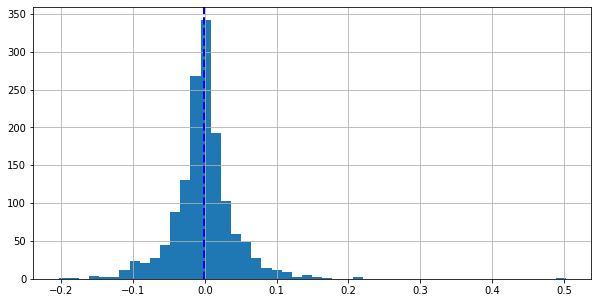

In [10]:
import seaborn as sns
df['opclN'].hist(bins=50, figsize=(10,5)).axvline(df['opclN'].median(), color='b', linestyle='dashed', linewidth=2)

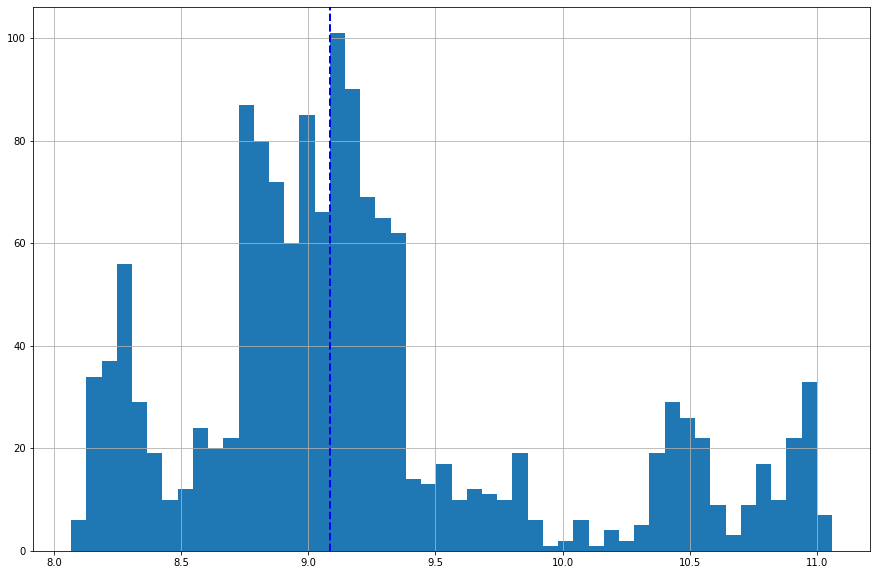

In [11]:
df['open'].hist(bins=50, figsize=(15,10)).axvline(df['open'].median(), color='b', linestyle='dashed', linewidth=2)

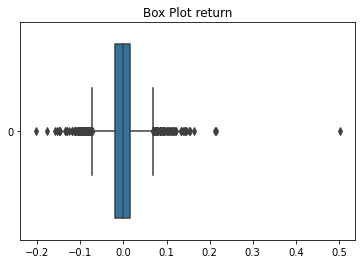

In [12]:
# Box plot of changing price.

sns.boxplot(data = df['opclN'], orient="h")
plt.title('Box Plot return')
plt.show()

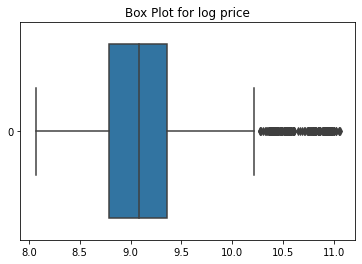

In [13]:
# Box plot of the open price.

sns.boxplot(data = df['open'], orient="h")
plt.title('Box Plot for log price')
plt.show()

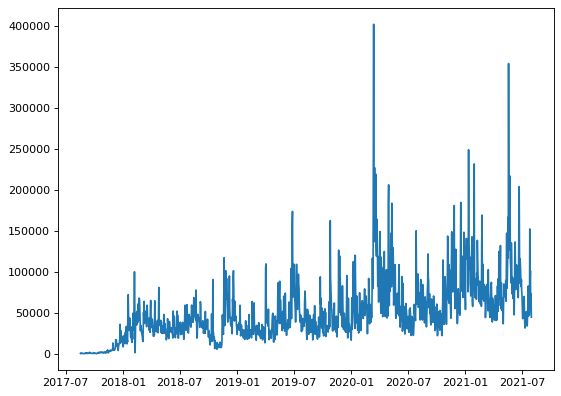

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['datetime'],df['volume'])

plt.show()

AttributeError: 'Line2D' object has no property 'rot'

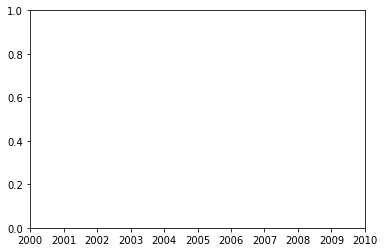

In [21]:
# rolling average of volume

plt.plot(df['datetime'],df['volume'].rolling(7).mean(),rot=0)
plt.show()

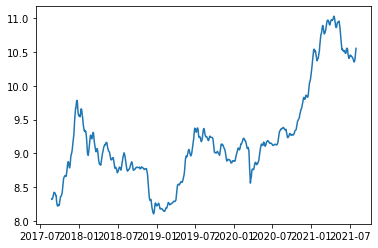

In [16]:
# Rolling average of price

plt.plot(df['datetime'],df['open'].rolling(7).mean())
plt.show()

In [17]:
# Use linear regression to find correlation

import numpy as np
from sklearn.linear_model import LinearRegression

Xtrain = df[['open','high','low','close','volume']]
ytrain = df[['opclN']]


model = LinearRegression().fit( Xtrain,ytrain)
model.score(Xtrain,ytrain)

0.006008596189346682

In [18]:
# Brownian Motion estimation

# Estimate mu just from the series end-points
# Note this is for a linear drift-diffusion process, i.e. the log of GBM

dt = 1

n = len(df['open'])

T = dt*n
ts = np.linspace(dt, T, n)


def simple_estimate_mu(series):
    return (series.iloc[-1] - series.iloc[0]) / T

# Use all the increments combined (maximum likelihood estimator)
# Note this is for a linear drift-diffusion process, i.e. the log of GBM
def incremental_estimate_mu(series):

    total = (1.0 / dt) * (ts**2).sum()
    return (1.0 / total) * (1.0 / dt) * ( ts * series ).sum()

# This just estimates the sigma by its definition as the infinitesimal variance (simple Monte Carlo)
# Note this is for a linear drift-diffusion process, i.e. the log of GBM
# One can do better than this of course (MLE?)
def estimate_sigma(series):
    dt = 1
    return np.sqrt( ( np.diff(series)**2 ).sum() / (n * dt))

# Estimator helper
all_estimates0 = lambda s: (simple_estimate_mu(s), incremental_estimate_mu(s), estimate_sigma(s))

# Since log-GBM is a linear Ito drift-diffusion process (scaled Wiener process with drift), we
# take the log of the realizations, compute mu and sigma, and then translate the mu and sigma
# to that of the GBM (instead of the log-GBM). (For sigma, nothing is required in this simple case).
def gbm_drift(log_mu, log_sigma):
    return log_mu + 0.5 * log_sigma**2

# Translates all the estimates from the log-series
def all_estimates(es):
    lmu1, lmu2, sigma = all_estimates0(es)
    return gbm_drift(lmu1, sigma), gbm_drift(lmu2, sigma), sigma



### Using one series ###
log_series = df['open']

print('Using 1 series: mu1 = %.7f, mu2 = %.7f, sigma = %.7f' % all_estimates(log_series) )


Using 1 series: mu1 = 0.0025398, mu2 = 0.0108138, sigma = 0.0436566


As the mu1 and mu2 has a large bias, we conclude that Brownian Motion is not a good process to decribe this sequence. Some other process like Levy process (Say CGMY) might be better.